<a href="https://colab.research.google.com/github/chrisrutherford/biostats/blob/master/netflix/Netflix_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Netflix data

From [Kaggle](https://www.kaggle.com/shivamb/netflix-shows):

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. 

## Importing libraries and the data

We begin by importing some common analysis libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns; sns.set()
import warnings # ignore warnings about x axes on barplots
warnings.filterwarnings("ignore")

In [3]:
pip install adjustText # space out text on dots close together

  Created wheel for adjustText: filename=adjustText-0.7.3-cp37-none-any.whl size=7100 sha256=302e5bea08ca865fe458f63234c9ce673979c27662243b9f2f7afd46d8bb4599
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


In [4]:
from adjustText import adjust_text

Importing the data:

In [5]:
data = pd.read_csv("https://github.com/chrisrutherford/projects/blob/master/netflix/netflix_titles.csv?raw=true")

Let's verify that the data imported properly:

In [6]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [7]:
print(data.dtypes)
print("\nNAs:")
print(np.sum(pd.isna(data)))

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

NAs:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


Everything seems alright so far. Some data is missing in a few columns, but this is likely from Netflix or the search engine. Additionally, every column besides `release_year` imported as an object, so we should convert them to manipulate and work with them easier. We can automatically convert all of the columns first and then convert individual columns as necessary.

## Converting data types

In [8]:
data_conv = data.convert_dtypes()
data_conv

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,<NA>,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,<NA>,Nasty C,<NA>,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,<NA>,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [9]:
data_conv.dtypes

show_id         string
type            string
title           string
director        string
cast            string
country         string
date_added      string
release_year     Int64
rating          string
duration        string
listed_in       string
description     string
dtype: object

Now that each column is a string, it will be much easier to deal with any other conversions. Either way, it will be easier to manipulate the data compared to dealing with an object.

Since `date_added` is a date, we will convert it to a datetime object instead of leaving it as a string.

In [10]:
data_conv["date_added"] = pd.to_datetime(data_conv["date_added"])

In [11]:
data_conv["date_added"]

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7787, dtype: datetime64[ns]

This may be a little easier to work with now. We can look at how various columns are distributed, starting with the number of TV shows and movies:

## Movies vs. TV Shows

In [12]:
type_count = data_conv['type'].value_counts() # count how many movies and TV shows there are
type_count

Movie      5377
TV Show    2410
Name: type, dtype: Int64

In [13]:
#create subsets of data
tv_shows = data_conv[data_conv['type'] == "TV Show"]
movies = data_conv[data_conv['type'] == "Movie"]
print(len(movies), len(tv_shows))

5377 2410


### Distribution of age ratings

In [14]:
ratings_count_tv = tv_shows['rating'].value_counts()
ratings_count_movies = movies['rating'].value_counts()

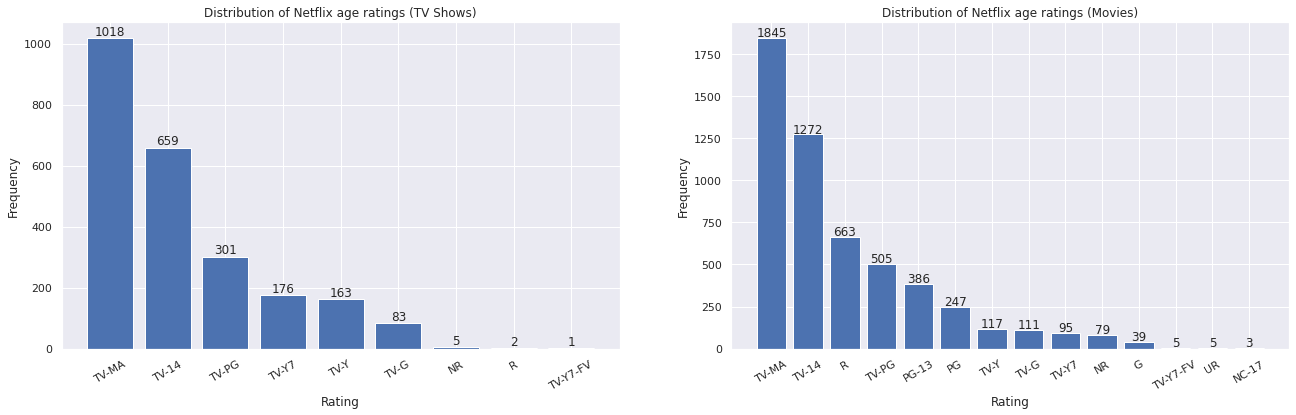

In [77]:
x, y = ratings_count_tv.index, ratings_count_tv.values
plt.figure(figsize = (22, 6))
plt.subplot(1,2,1)
plt.title("Distribution of Netflix age ratings (TV Shows)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks(rotation = 30)
plt.bar(x = x, height = y)
for i in range(len(ratings_count_tv)):
    plt.text(x = x[i], y = y[i]+10, s = y[i], ha = 'center')


x, y = ratings_count_movies.index, ratings_count_movies.values
plt.subplot(1,2,2)
plt.title("Distribution of Netflix age ratings (Movies)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks(rotation = 30)
plt.bar(x = x, height = y)
for i in range(len(ratings_count_movies)):
    plt.text(x = x[i], y = y[i]+10, s = y[i], ha = 'center')
plt.show()

The R rating being given to TV shows may be an error, as this is usually only given to movies.

Next, we can look at how many new titles were added to Netflix each year.

### Titles added to Netflix annually

In [16]:
year_count = data_conv['date_added'].dt.year.value_counts()

In [17]:
year_count.sort_index(inplace = True)

[]

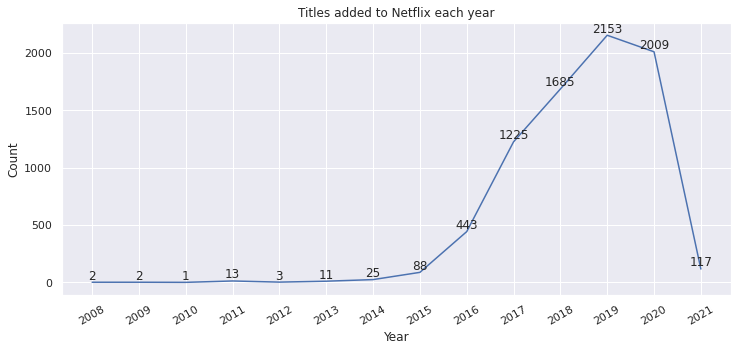

In [79]:
plt.figure(figsize = (12, 5))
plt.plot(year_count.index, year_count.values)
for i in range(len(year_count)):
    plt.text(x = year_count.index[i], y = year_count.values[i]+25, s = year_count.values[i],
             ha = 'center')
plt.title("Titles added to Netflix each year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(np.arange(min(year_count.index), max(year_count.index)+1),
           rotation = 30)
plt.plot()

A possible explanation for the low title addition counts before 2016 could be due to older titles being removed due to low viewership, license expiration, etc.

We can also see how many TV shows and movies were added each year.

In [19]:
annual_tv_shows_new = tv_shows['date_added'].dt.year.value_counts()
annual_movies_new = movies['date_added'].dt.year.value_counts()

In [20]:
annual_tv_shows_new = annual_tv_shows_new.sort_index()
annual_movies_new = annual_movies_new.sort_index()

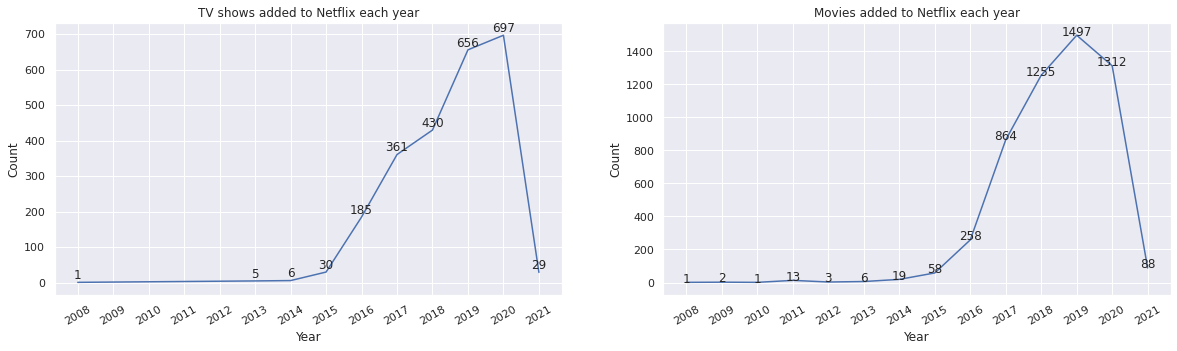

In [72]:
x, y = annual_tv_shows_new.index, annual_tv_shows_new.values
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
plt.plot(x, y)
for i in range(len(annual_tv_shows_new)):
    plt.text(x = x[i], y = y[i]+10, s = y[i], ha = 'center')
plt.title("TV shows added to Netflix each year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(np.arange(min(x), max(x)+1),
           rotation = 30)

x, y = annual_movies_new.index, annual_movies_new.values
plt.subplot(1,2,2)
plt.plot(x, y)
for i in range(len(annual_movies_new)):
    plt.text(x = x[i], y = y[i], s = y[i], ha = 'center')
plt.title("Movies added to Netflix each year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(np.arange(min(annual_movies_new.index), max(annual_movies_new.index)+1),
           rotation = 30)
plt.show()

In [22]:
data_conv[data_conv['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,<NA>,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,<NA>,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,<NA>,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,<NA>,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,<NA>,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,<NA>,Igor Dmitriev,<NA>,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,<NA>,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,<NA>,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,<NA>,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,<NA>,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


So, ten of the titles in this dataset do not have dates for when they were added.

While on the topic of dates, we can look at how old or new the content on Netflix actually is.

In [23]:
release_year_dist = data_conv['release_year'].value_counts()

In [24]:
release_year_dist.sort_index(inplace = True)

In [25]:
release_year_dist

1925       1
1942       2
1943       3
1944       3
1945       3
        ... 
2017    1012
2018    1121
2019     996
2020     868
2021      31
Name: release_year, Length: 73, dtype: Int64

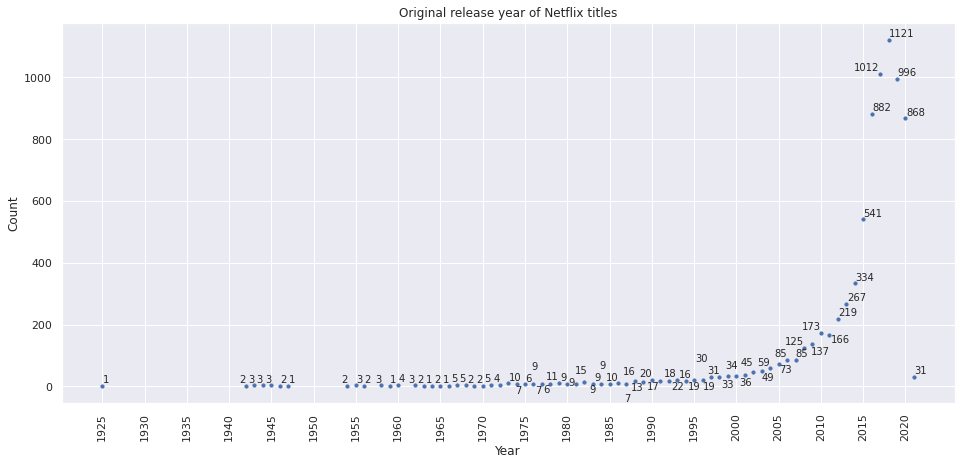

In [26]:
x, y = release_year_dist.index, release_year_dist.values

plt.figure(figsize = (16, 7))
plt.scatter(x, y, s = 10)
plt.title("Original release year of Netflix titles")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(np.arange(min(release_year_dist.index), max(release_year_dist.index)+1, 5),
           rotation = 90)
texts = [plt.text(x[i], y[i], y[i], fontsize = 10) for i in range(len(x))]
adjust_text(texts)
plt.show()

### Countries

In [34]:
country_count = data_conv['country'].value_counts()

In [35]:
country_count

United States                                        2555
India                                                 923
United Kingdom                                        397
Japan                                                 226
South Korea                                           183
                                                     ... 
France, Canada, Italy, United States, China             1
United Kingdom, South Korea                             1
United States, Philippines                              1
United States, United Kingdom, Spain, South Korea       1
Italy, Germany                                          1
Name: country, Length: 681, dtype: Int64

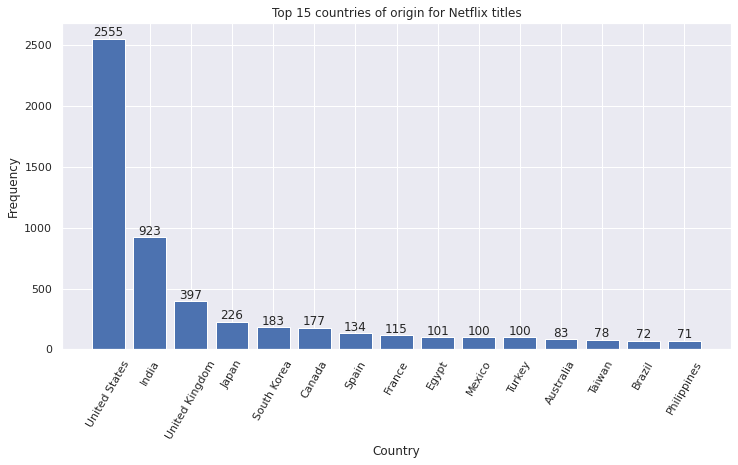

In [80]:
plt.figure(figsize = (12, 6))
num = 15 # quickly change how many countries are plotted
plt.title("Top {} countries of origin for Netflix titles".format(num))
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.xticks(rotation = 60)
x, y = country_count.index, country_count.values
plt.bar(x = x[0:num], height = y[0:num])
for i in range(num):
    plt.text(x = i, y = y[i]+20, s = y[i], ha = 'center')
plt.show()